# Compare Climate Variables

## Imports

In [1]:
import xarray as xr
import pandas as pd
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

c:\Users\marti\Desktop\data\hw_extra


In [4]:
from IndexDrivers import (
    AnomaliesIndex,
    MaxIndex
)
from PredictorsDrivers import (
    Predictor
)

In [5]:
def calculate_anomalies(data, climatology_period, box=None):
    data_reference = data.sel(time=slice(f"{climatology_period[0]}-01",f"{climatology_period[1]}-12"))
    mean_reference = data_reference.groupby("time.month").mean(dim="time")
    gb_season = data.groupby("time.month")
    anomalies = gb_season - mean_reference
    if box:
        return anomalies.sel(longitude=slice(box[0], box[1]), latitude=slice(box[2], box[3]))
    else:
        return anomalies



In [6]:
data = xr.load_dataset(f"data/local_data/7means_east_pacific.nc")
u10 = data.u10

In [14]:
data_850 = xr.load_dataset(f"data/local_data/3means_850hpa_east_pacific.nc")
u850 = data_850.u

Text(0.5, 1.0, 'U850 Anomalies')

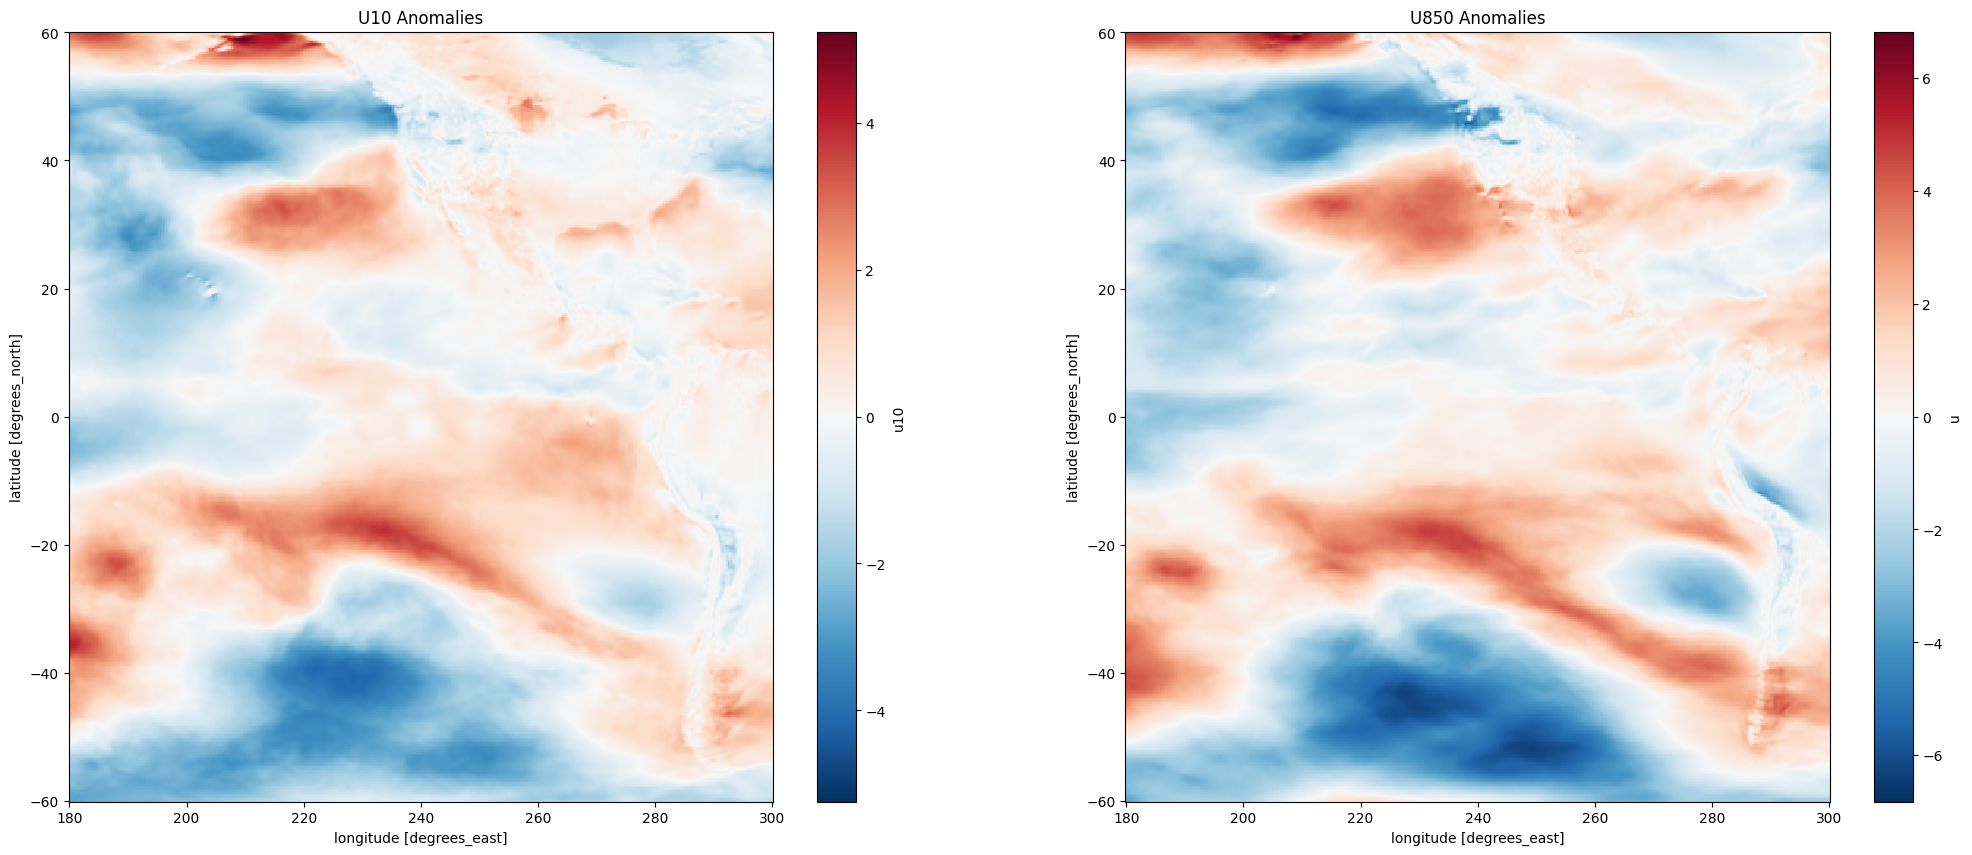

In [15]:
anom_u10 = calculate_anomalies(u10, [1980,2018])
anom_u850 = calculate_anomalies(u850, [1980,2018])
fig, axs = plt.subplots(1, 2, figsize=(25,10))
anom_u10.sel(time="2017-01").plot(ax=axs[0])
axs[0].set_title("U10 Anomalies")
anom_u850.sel(time="2017-01").plot(ax=axs[1])
axs[1].set_title("U850 Anomalies")


Text(0.5, 1.0, 'U850 Anomalies')

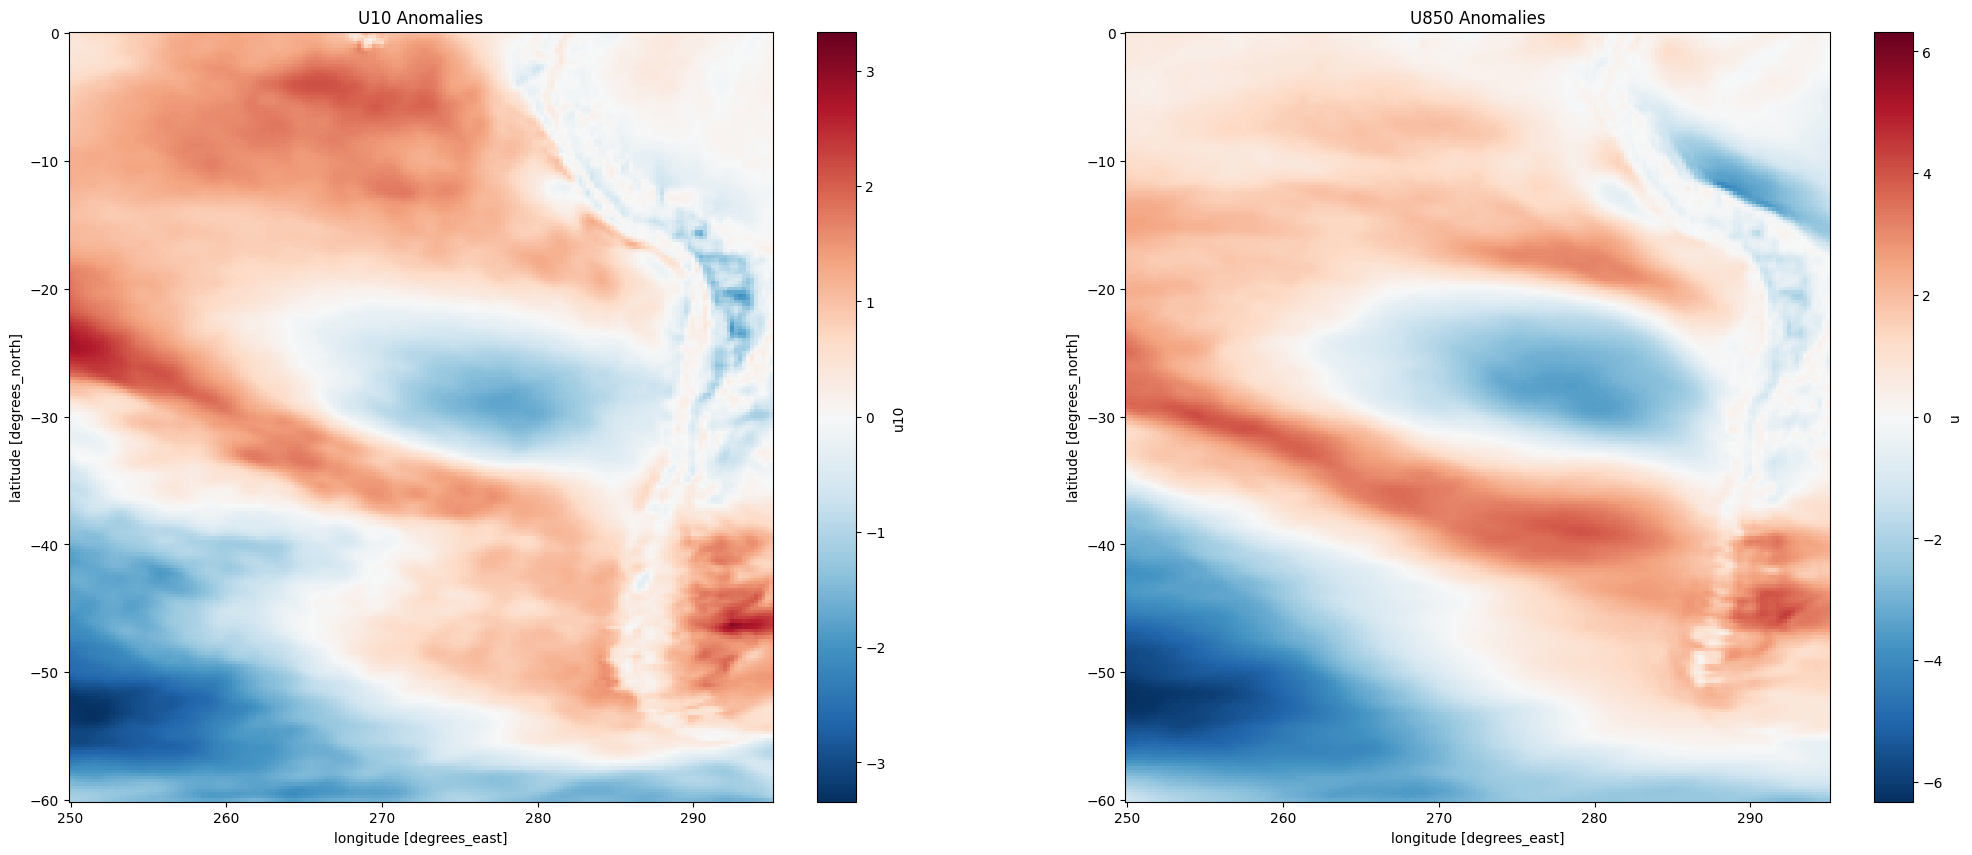

In [16]:
anom_u10 = calculate_anomalies(u10, [1980,2018], box=[250,295, -60, 0])
anom_u850 = calculate_anomalies(u850, [1980,2018], box=[250,295, -60, 0])
fig, axs = plt.subplots(1, 2, figsize=(25,10))
anom_u10.sel(time="2017-01").plot(ax=axs[0])
axs[0].set_title("U10 Anomalies")
anom_u850.sel(time="2017-01").plot(ax=axs[1])
axs[1].set_title("U850 Anomalies")


In [19]:
anom_index_u10 = AnomaliesIndex(data, [1972,2022], [1980,2018], variables=["U10"], box_limit=[282, 290, -43, -30], rolling_window=1, frequency="monthly")
anom_index_u850 = AnomaliesIndex(data_850, [1972,2022], [1980,2018], variables=["U"], box_limit=[282, 290, -43, -30], rolling_window=1, frequency="monthly")

<Axes: xlabel='Date'>

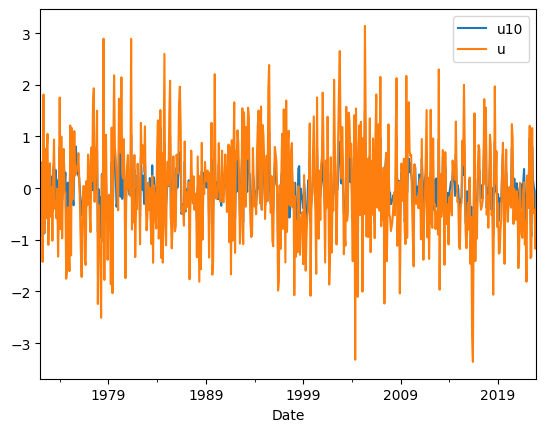

In [24]:
dfu10 = anom_index_u10.get_index_by_variable("U10")
dfu850 = anom_index_u850.get_index_by_variable("U")
df = pd.concat([dfu10, dfu850], axis=1)
df.plot(kind="line")

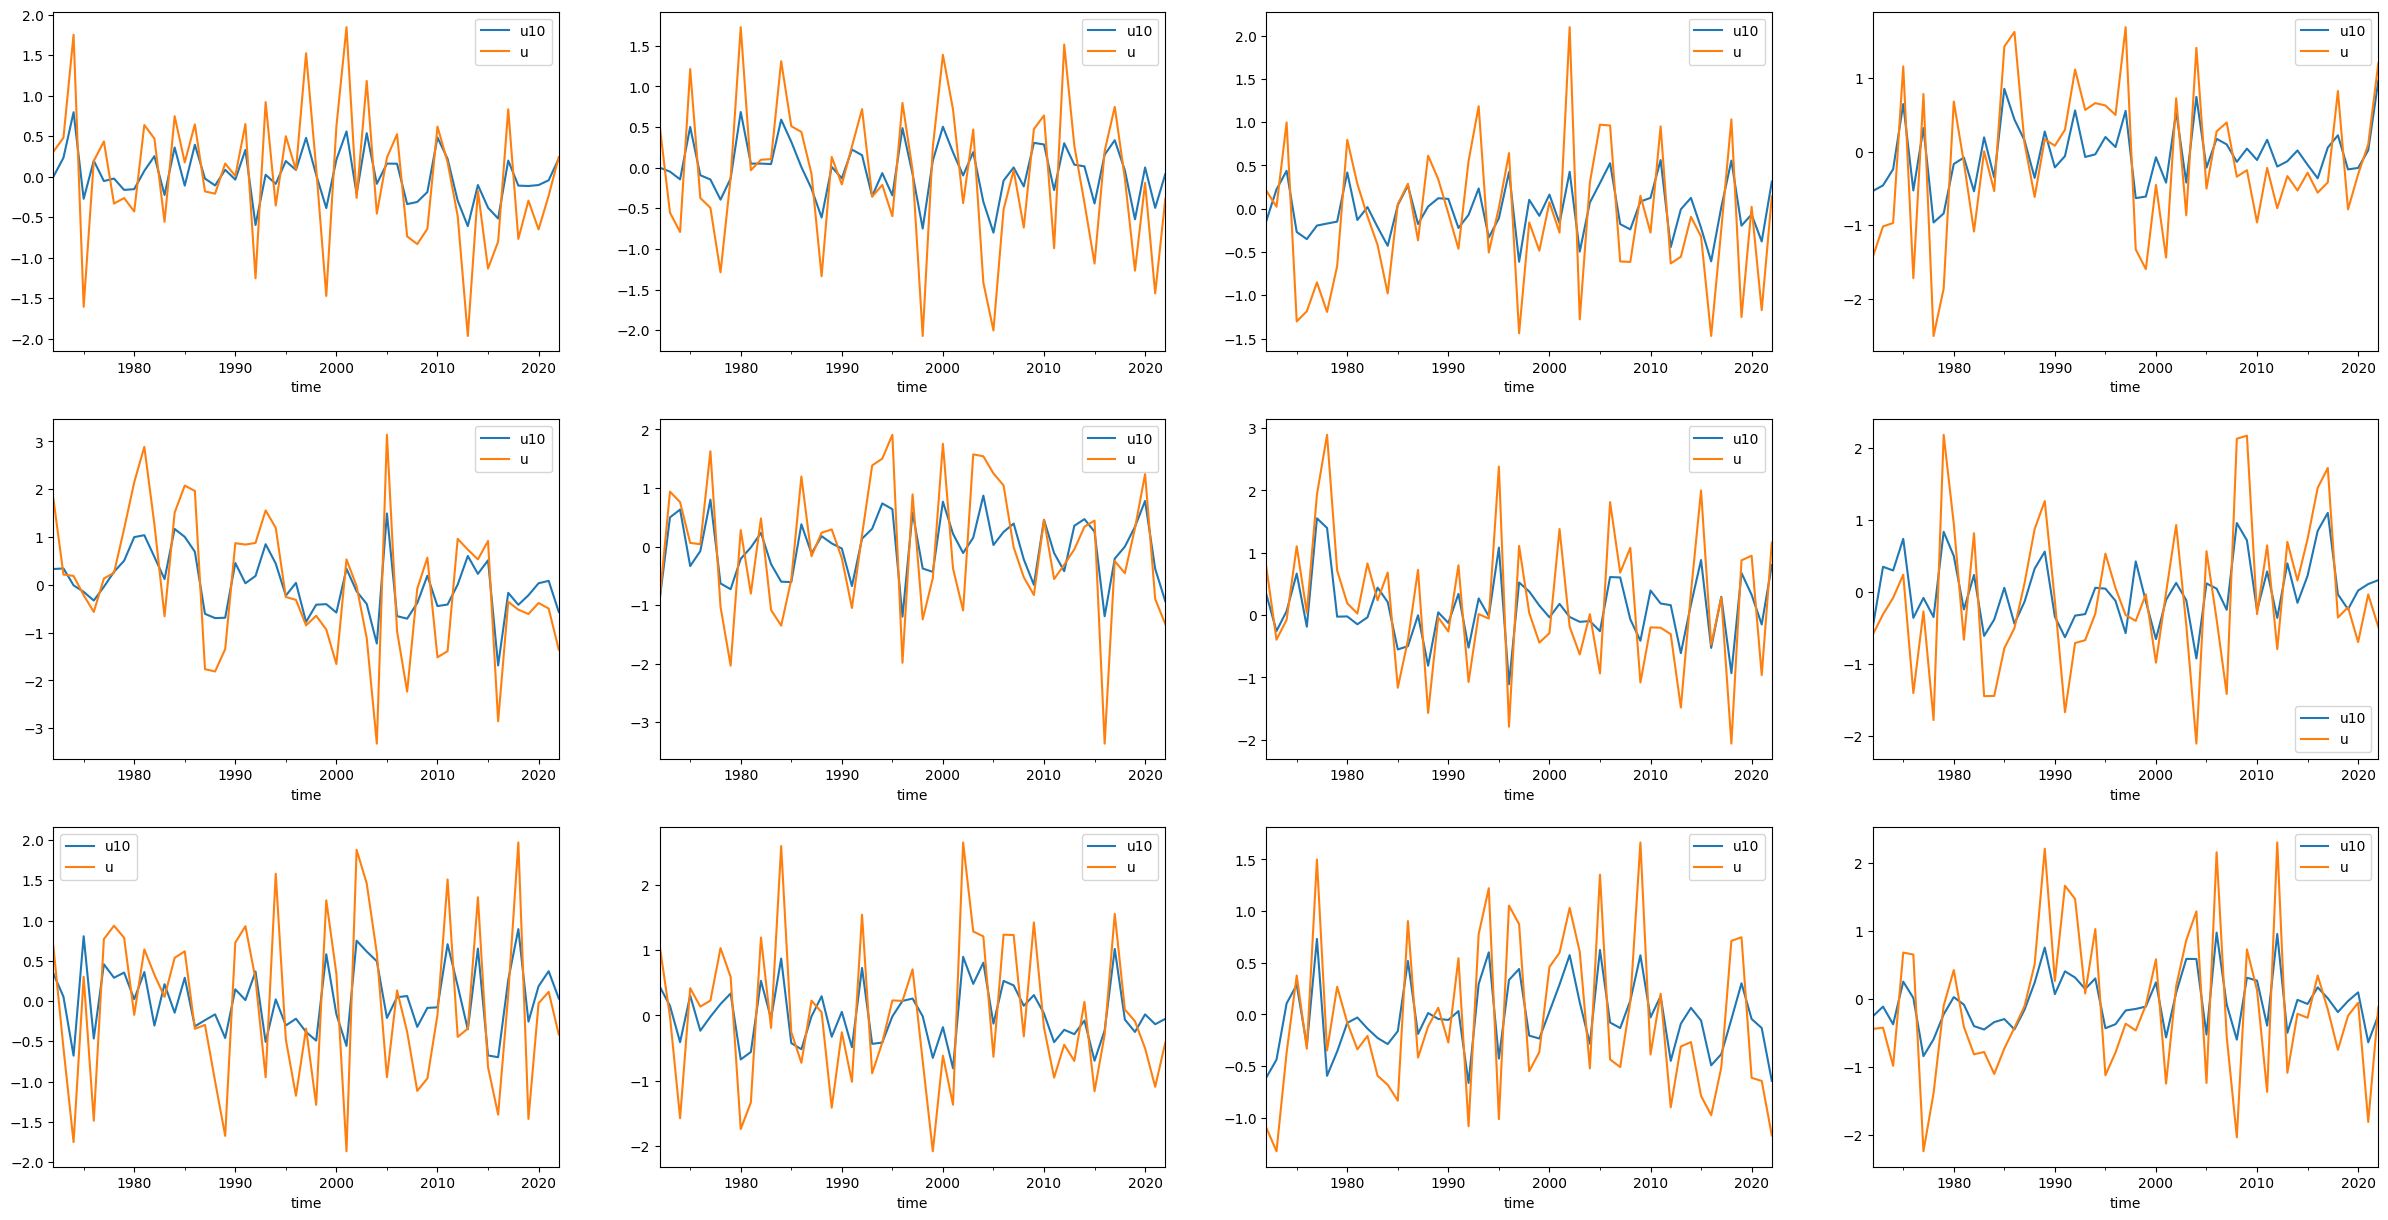

In [29]:
fig, axs = plt.subplots(3, 4, figsize=(30,15))
for i in range(1,13):
    dfu10 = anom_index_u10.get_index_by_variable_season(i, "U10")
    dfu850 = anom_index_u850.get_index_by_variable_season(i, "U")
    df = pd.concat([dfu10, dfu850], axis=1)
    df.drop(columns=["month", "month"], inplace=True)
    df.plot(kind="line", ax=axs.flatten()[i-1])